In [1]:
import pandas as pd
import numpy as np

# Seed set for reproducibility
np.random.seed(42)

# Generate dummy data
data = {
    "Size": np.random.randint(500, 5000, size=50),  # size in sq. feet
    "Location": np.random.choice(["Urban", "Suburban", "Rural"], size=50),
    "Number_of_Rooms": np.random.randint(1, 8, size=50),
    "Price": np.random.randint(50000, 500000, size=50)  # target variable
}

# Create DataFrame
df = pd.DataFrame(data)

# Show first 10 rows
print(df.head(10))

# Save dataset to CSV (if needed)
df.to_csv("house_dataset.csv", index=False)


   Size  Location  Number_of_Rooms   Price
0  1360  Suburban                1  299002
1  4272  Suburban                4  300396
2  3592  Suburban                7  214899
3   966  Suburban                1  499036
4  4926  Suburban                4  374767
5  3944  Suburban                2  387594
6  3671  Suburban                1  405570
7  3419     Urban                7  429989
8   630     Rural                7  465515
9  2185  Suburban                6   93585


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("house_dataset.csv")

In [6]:
print("First 5 rows:\n",df.head())
print("\nDataset Info:\n")
print(df.info())

First 5 rows:
    Size  Location  Number_of_Rooms   Price
0  1360  Suburban                1  299002
1  4272  Suburban                4  300396
2  3592  Suburban                7  214899
3   966  Suburban                1  499036
4  4926  Suburban                4  374767

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             50 non-null     int64 
 1   Location         50 non-null     object
 2   Number_of_Rooms  50 non-null     int64 
 3   Price            50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


In [7]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Size               0
Location           0
Number_of_Rooms    0
Price              0
dtype: int64


In [8]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
               Size  Number_of_Rooms          Price
count    50.000000        50.000000      50.000000
mean   2623.800000         4.460000  287309.180000
std    1192.669138         2.159081  146664.435466
min     534.000000         1.000000   52693.000000
25%    1607.500000         3.000000  164154.000000
50%    2877.000000         5.000000  296154.500000
75%    3483.500000         7.000000  427834.000000
max    4926.000000         7.000000  499036.000000


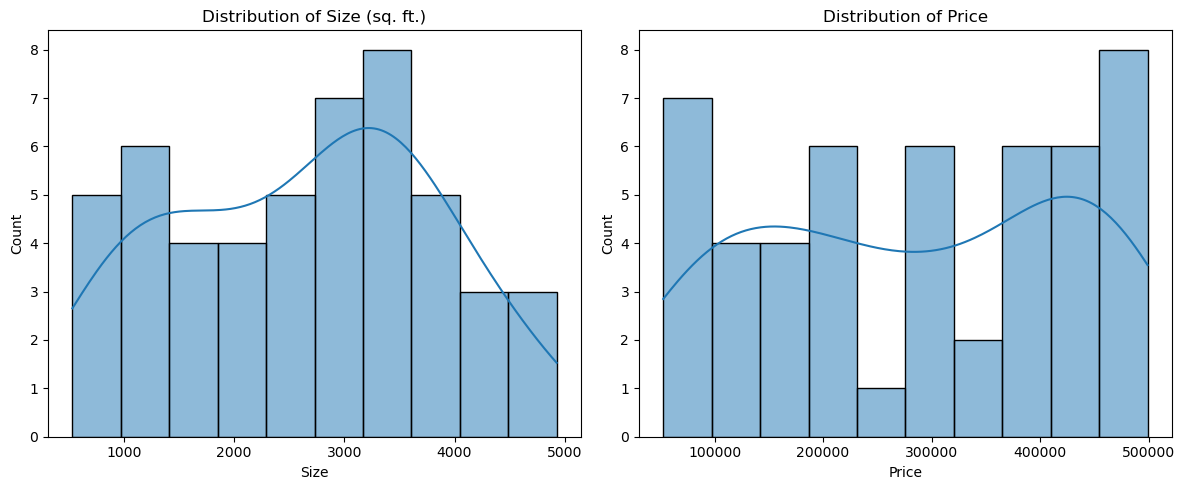

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Size"], bins=10, kde=True)
plt.title("Distribution of Size (sq. ft.)")

plt.subplot(1,2,2)
sns.histplot(df["Price"], bins=10, kde=True)
plt.title("Distribution of Price")

plt.tight_layout()
plt.show()

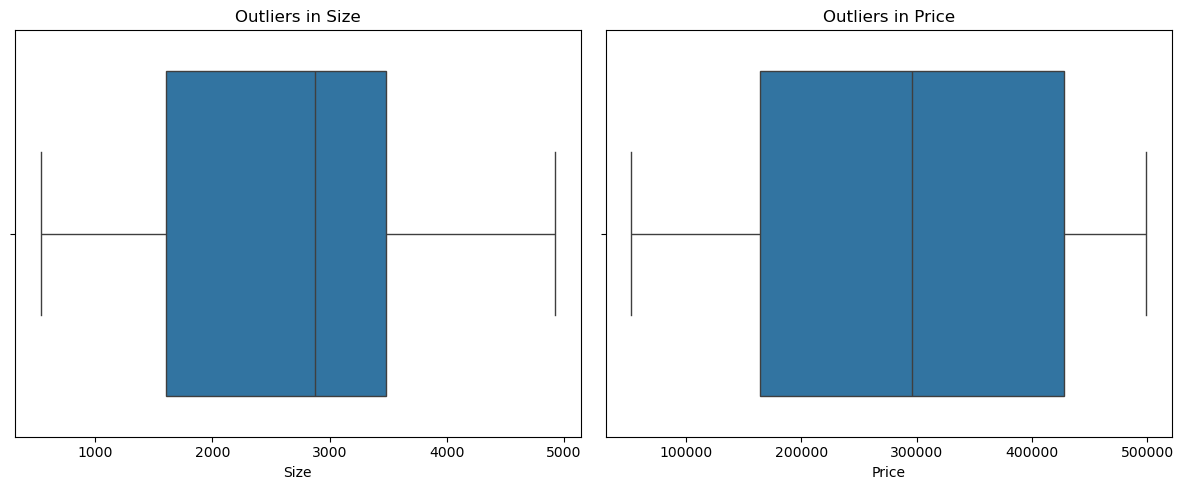

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df["Size"])
plt.title("Outliers in Size")

plt.subplot(1,2,2)
sns.boxplot(x=df["Price"])
plt.title("Outliers in Price")

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

In [12]:
print("Original Data:\n", df.head())

Original Data:
    Size  Location  Number_of_Rooms   Price
0  1360  Suburban                1  299002
1  4272  Suburban                4  300396
2  3592  Suburban                7  214899
3   966  Suburban                1  499036
4  4926  Suburban                4  374767


In [13]:
scaler = MinMaxScaler()   
df[["Size", "Number_of_Rooms"]] = scaler.fit_transform(df[["Size", "Number_of_Rooms"]])

print("\nAfter Normalization (Min-Max Scaling):\n", df.head())


After Normalization (Min-Max Scaling):
        Size  Location  Number_of_Rooms   Price
0  0.188069  Suburban              0.0  299002
1  0.851093  Suburban              0.5  300396
2  0.696266  Suburban              1.0  214899
3  0.098361  Suburban              0.0  499036
4  1.000000  Suburban              0.5  374767


In [14]:
print("\nAfter Encoding Location:\n", df.head())


After Encoding Location:
        Size  Location  Number_of_Rooms   Price
0  0.188069  Suburban              0.0  299002
1  0.851093  Suburban              0.5  300396
2  0.696266  Suburban              1.0  214899
3  0.098361  Suburban              0.0  499036
4  1.000000  Suburban              0.5  374767


In [15]:
print("\nFinal Preprocessed Dataset:\n", df.head())


Final Preprocessed Dataset:
        Size  Location  Number_of_Rooms   Price
0  0.188069  Suburban              0.0  299002
1  0.851093  Suburban              0.5  300396
2  0.696266  Suburban              1.0  214899
3  0.098361  Suburban              0.0  499036
4  1.000000  Suburban              0.5  374767


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("house_dataset.csv")

In [18]:
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

In [20]:
corr_matrix = df.corr()
print("\nCorrelation with Price:\n", corr_matrix["Price"].sort_values(ascending=False))


Correlation with Price:
 Price                1.000000
Location_Suburban    0.169764
Size                -0.040309
Location_Urban      -0.131879
Number_of_Rooms     -0.199566
Name: Price, dtype: float64


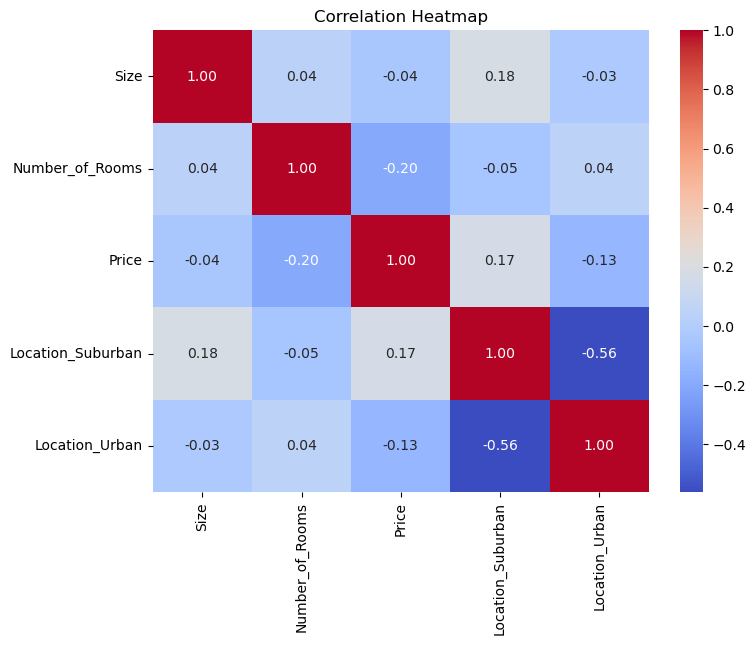

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [23]:
df = pd.read_csv("house_dataset.csv")

In [24]:
df = pd.get_dummies(df, columns=["Location"], drop_first=True)

In [25]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (40, 4)
Testing Set Shape: (10, 4)


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nModel Performance:")
print("R² Score:", r2)
print("Mean Squared Error:", mse)


Model Performance:
R² Score: 0.016729938754838525
Mean Squared Error: 19910608069.733498


In [31]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nFeature Coefficients:\n", coef_df)


Feature Coefficients:
              Feature   Coefficient
0               Size     -0.474804
1    Number_of_Rooms -13360.637334
2  Location_Suburban  41581.604406
3     Location_Urban  28610.273833


In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
# RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [34]:
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print("Root Mean Square Error (RMSE):", rmse)
print("R² Score:", r2)


Model Evaluation Results:
Root Mean Square Error (RMSE): 141104.95409351686
R² Score: 0.016729938754838525


In [35]:
results = pd.DataFrame({"Actual Price": y_test, "Predicted Price": y_pred})
print("\nComparison of Actual vs Predicted:\n", results.head())


Comparison of Actual vs Predicted:
     Actual Price  Predicted Price
13        492296    276384.490620
39        186602    221889.989089
30        335920    329258.192167
45        439803    247512.092406
17        293307    316803.513491


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [37]:
results = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
})
print(results.head(10))


   Actual Price  Predicted Price
0        492296    276384.490620
1        186602    221889.989089
2        335920    329258.192167
3        439803    247512.092406
4        293307    316803.513491
5        405701    248709.548194
6        458923    262159.235129
7        125766    249316.576451
8        178376    248767.702981
9         75939    249400.141962


In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Square Error (RMSE): 141104.95409351686
R² Score: 0.016729938754838525


In [39]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coef_df)


             Feature   Coefficient
2  Location_Suburban  41581.604406
3     Location_Urban  28610.273833
0               Size     -0.474804
1    Number_of_Rooms -13360.637334
